<a href="https://colab.research.google.com/github/Gajalakshmisubramani/compuervision_codes/blob/main/sift%2Csurf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

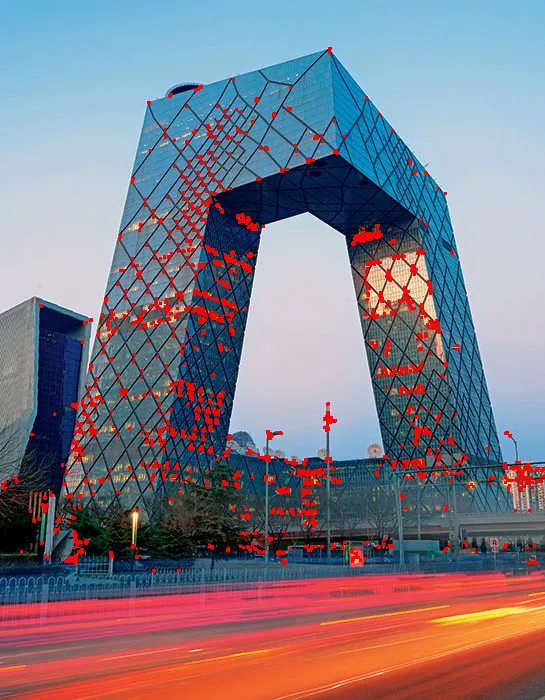

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/building.jpg")
operatedImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
dest = cv2.dilate(dest, None)
image[dest > 0.01 * dest.max()]=[0, 0, 255]
cv2_imshow(image)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

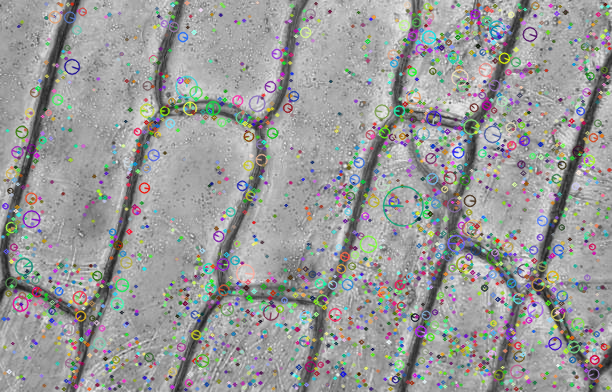

In [ ]:
import cv2
img = cv2.imread('/content/cell.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

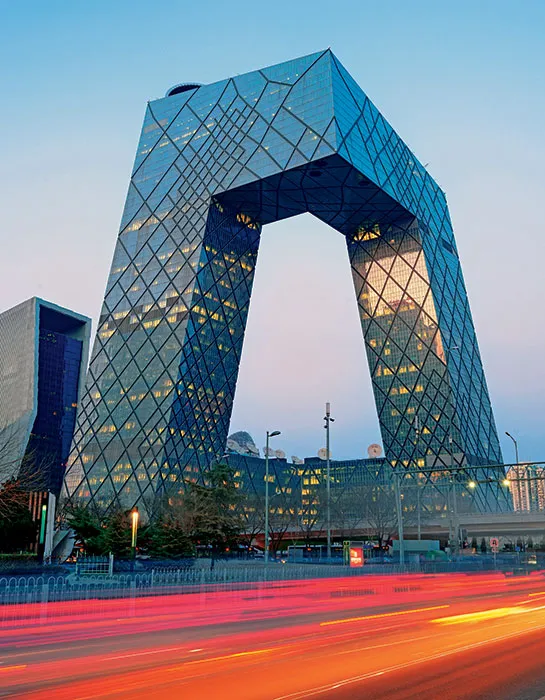

In [ ]:
import cv2
import numpy as np
img = cv2.imread('/content/building.jpg')
id_kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])
flt_img = cv2.filter2D(src = img,ddepth = -1,kernel = id_kernel)
cv2_imshow(flt_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

100%|██████████| 21.5M/21.5M [00:00<00:00, 161MB/s]


requirements: Ultralytics requirement ['lapx>=0.5.2'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.6s, installed 1 package: ['lapx>=0.5.2']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x448 1 dog, 634.6ms
Speed: 6.6ms preprocess, 634.6ms inference, 36.1ms postprocess per image at shape (1, 3, 640, 448)


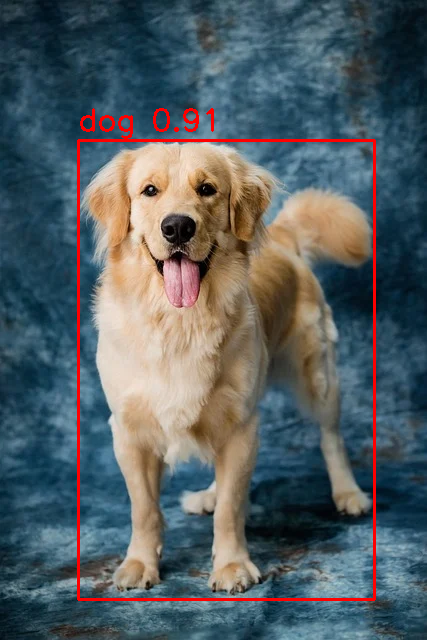

In [ ]:
!pip install ultralytics

import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

def getColours(cls):
    # Define a list of colors (you can customize these)
    colors = [(0, 255, 0), (0, 0, 255), (255, 0, 0)]
    return colors[cls % len(colors)]  # Cycle through the colors


# Load the model
yolo = YOLO('yolov8s.pt')

# Load the image
# Replace with the actual path to your image
image_path = r'/content/dog.jpg'
frame = cv2.imread(image_path)

if frame is None:
    print("Failed to read image. Exiting...")
    exit()

results = yolo.track(frame, stream=True)

for result in results:
    # get the class names
    classes_names = result.names

    # iterate over each box
    for box in result.boxes:
        # check if confidence is greater than 40 percent
        if box.conf[0] > 0.4:
            # get coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # get the class
            cls = int(box.cls[0])

            # get the class name
            class_name = classes_names[cls]

            # get the respective colour
            colour = getColours(cls)

            # draw the rectangle
            cv2.rectangle(frame, (x1, y1), (x2, y2), colour, 2)

            # put the class name and confidence on the image
            cv2.putText(frame, f'{class_name} {box.conf[0]:.2f}',
                        (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)

# show the image
cv2_imshow(frame)

# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
model = Sequential([
Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
LSTM(64, return_sequences=False),
Dropout(0.5),
Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test),
verbose=1)
def analyze_sentiment(sentence):
    word_index = imdb.get_word_index()
    sequence = [word_index.get(word, 2) for word in sentence.lower().split()]
    padded = pad_sequences([sequence], maxlen=maxlen)
    prediction = model.predict(padded)
    return prediction[0][0]
sentence = "I hate this movie!"
sentiment = analyze_sentiment(sentence)
print("Sentiment score:", sentiment)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 187s 472ms/step - accuracy: 0.6622 - loss: 0.5865 - val_accuracy: 0.8503 - val_loss: 0.3658
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 196s 458ms/step - accuracy: 0.8830 - loss: 0.2966 - val_accuracy: 0.8660 - val_loss: 0.3325
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 187s 420ms/step - accuracy: 0.9066 - loss: 0.2445 - val_accuracy: 0.8610 - val_loss: 0.3491
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Sentiment score: 0.25311852
